In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import smbus2
import time
from IPython.core.display import display, update_display, HTML

In [1]:
import numpy as np
import time

from gpiozero import LineSensor, Motor

class MeasurementTable(object):
    def __init__(self, 
                 motor_forward_pin=24, 
                 motor_backward_pin=23, 
                 motor_enable_pin=25,
                 motor_speed=1.0,
                 lsensor_pin=16, 
                 lsensor_sample_rate=300,
                 lsensor_resolution_deg=1.0
                ):
        self.motor = Motor(forward=motor_forward_pin, backward=motor_backward_pin, enable=motor_enable_pin)
        self.motor_speed = motor_speed
        self.lsensor = LineSensor(lsensor_pin, sample_rate=lsensor_sample_rate)
        self.lsensor_resolution_deg = lsensor_resolution_deg
        self.reset()
        
        def inc():
            self.times.append(time.time())
            if self.fwddir:
                self.cnt += 1
            elif self.bckdir:
                self.cnt -= 1
            if self.cnt == self.target:
                self.targetf()                
            
        self.lsensor.when_line = inc
        self.lsensor.when_no_line = inc
        
    def state(self):
        return {'cnt': self.cnt, 'fwddir': self.fwddir, 'bckdir': self.bckdir}
    
    def close(self):
        self.lsensor.close()
        self.reset()
        
    def reset(self):
        self.cnt = 0
        self.fwddir = False
        self.bckdir = False
        self.target = -1
        self.times = []
    
    def waitfor(self, target, targetf):
        self.target = target
        self.targetf = targetf
        
    def rotate(self, deg):
        if self.motor.is_active:
            return False
        
        nsteps = round(deg / (self.lsensor_resolution_deg))   
            
        self.waitfor(self.cnt + nsteps, self.stop)
        if nsteps > 0:
            self.fwddir = True
            self.bckdir = False
            self.motor.forward()
        else:
            self.fwddir = False
            self.bckdir = True
            self.motor.backward()
        
        return True
    
    def stop(self):
        self.motor.stop()
        self.fwddir = False
        self.bckdir = False

In [7]:
mtable.close()

In [2]:
mtable = MeasurementTable()

In [3]:
mtable.state()

{'cnt': 0, 'fwddir': False, 'bckdir': False}

In [5]:
mtable.rotate(-10)

True

# TCRT5000 + LM393 Proximity Sensor

In [2]:
from gpiozero import LineSensor
from signal import pause

In [203]:
acounter.close()

In [204]:
class AngleCounter:
    def __init__(self, pin=16, sample_rate=300, renc=None):
        self.sensor = LineSensor(pin, sample_rate=sample_rate)
        self.renc = renc
        self.reset()
        
        def inc():
            self.times.append(time.time())
            if self.renc is not None:
                self.rencdata.append(self.renc.get_deg_offset_angle())
            self.cnt += 1
            if self.cnt == self.target:
                self.targetf()                
            
        self.sensor.when_line = inc
        self.sensor.when_no_line = inc
        
    def close(self):
        self.sensor.close()
        
    def reset(self):
        self.cnt = 0
        self.target = -1
        self.times = []
        self.rencdata = []
        
    def waitfor(self, target, f):
        self.target = target
        self.targetf = f

renc = AS5600()
renc.detect_magnet()
renc.set_deg_offset()
acounter = AngleCounter(renc=renc)

0b110000


In [206]:
acounter.cnt, acounter.target, renc.degoffset

(0, -1, 178.505859375)

In [243]:
acounter.reset()
acounter.waitfor(360, lambda: motor.stop())
# acounter.htmlcounter()

In [244]:
motor.forward(1.0)

In [194]:
acounter.reset()
acounter.waitfor(1, lambda: motor.stop())
motor.backward(0.3)
# motor.forward(0.3)

In [192]:
motor.stop()

In [245]:
ts = np.array(acounter.times)
angles = np.array(acounter.rencdata)
ts -= ts[0]

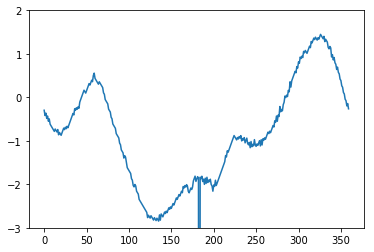

In [246]:
plt.plot(angles - np.arange(0, len(angles)) - 1);
plt.ylim(-3, 2);

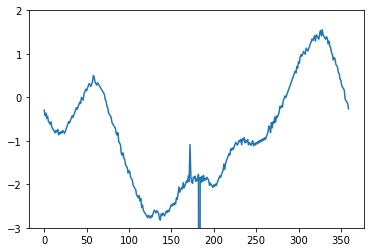

In [240]:
plt.plot(angles - np.arange(0, len(angles)) - 1);
plt.ylim(-3, 2);

In [242]:
angles[120]

118.30078125

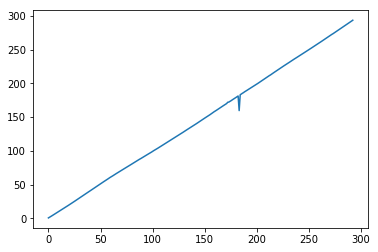

In [218]:
plt.plot(angles);

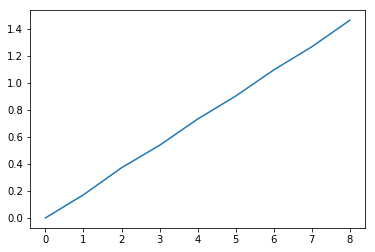

In [212]:
plt.plot(ts);

0.18187952041625977

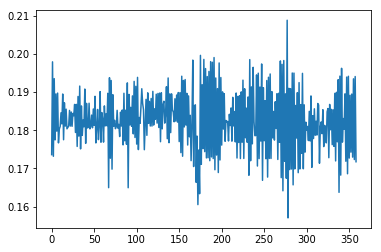

In [247]:
plt.plot(np.diff(ts));
np.median(np.diff(ts))

# L298N Motor Driver

In [3]:
from gpiozero import Motor
from time import sleep

In [4]:
in1 = 24
in2 = 23
en = 25
motor = Motor(forward=in1, backward=in2, enable=en)

In [141]:
motor.forward(0.1)

In [17]:
motor.backward(0.5)

In [18]:
motor.stop()

In [42]:
# speed = 0.1
speed = 1.0
secs = 60
motor.forward(speed)
sleep(secs)
motor.backward(speed)
sleep(secs)
motor.stop()

KeyboardInterrupt: 

In [100]:
speed = 1.0
secs = 0.3
for i in range(10):
    motor.forward(speed)
    sleep(secs)
    motor.backward(speed)
    sleep(secs)
motor.stop()

In [107]:
secs = 0.1
for speed in np.linspace(0.1, 1.0, 100):
#     motor.forward(speed)
    motor.backward(speed)
    sleep(secs)
motor.stop()

# SSD1306 0.96" OLED display

https://learn.adafruit.com/monochrome-oled-breakouts/python-setup

In [1]:
import board
import busio
import adafruit_ssd1306
from PIL import Image, ImageDraw, ImageFont

In [2]:
i2c = board.I2C()
print(i2c.scan())
i2c.deinit()

[60]


In [4]:
oled_reset = None
 
# Change these
# to the right size for your display!
WIDTH = 128
HEIGHT = 64  # Change to 64 if needed
BORDER = 5
 
# Use for I2C.
i2c = board.I2C()
print(i2c.scan())
oled = adafruit_ssd1306.SSD1306_I2C(WIDTH, HEIGHT, i2c, addr=0x3C, reset=oled_reset)

[60]


In [29]:
oled.fill(0)
oled.show()

image = Image.new("1", (oled.width, oled.height))

draw = ImageDraw.Draw(image)

# draw.rectangle((0, 0, oled.width, oled.height), outline=255, fill=255)

# font = ImageFont.load_default()
font = ImageFont.truetype("arial.ttf", 52)
 
text = "350.5"
(font_width, font_height) = font.getsize(text)
draw.text(
    (oled.width // 2 - font_width // 2, oled.height // 2 - font_height // 2),
    text,
    font=font,
    fill=255,
)

oled.image(image)
oled.show()

# AS5600 Rotary Encoder

Connect
* GND -> GND
* 5V -> 5V
* SDA -> SDA
* SCL -> SCL
* DIR -> 5V (or GND)

In [169]:
class AS5600:
    # inspired by https://github.com/m-rtijn/mpu6050
    # and https://github.com/Seeed-Studio/Seeed_Arduino_AS5600
    
    ZMCO = 0x00
    ZPOS_HI = 0x01
    ZPOS_LO = 0x02
    MPOS_HI = 0x03
    MPOS_LO = 0x04
    MANG_HI = 0x05
    MANG_LO = 0x06
    CONF_HI = 0x07    
    CONF_LO = 0x08
    RAW_ANG_HI = 0x0c
    RAW_ANG_LO = 0x0d
    ANG_HI = 0x0e
    ANG_LO = 0x0f
    STATUS = 0x0b
    AGC = 0x1a
    MAG_HI = 0x1b
    MAG_LO = 0x1c
    BURN = 0xff

    def __init__(self, channel = 1, address = 0x36):
        self.bus = smbus2.SMBus(channel)
        self.address = address
        self.degoffset = 0.0

    def read_i2c_word(self, register):
        """Read two i2c registers and combine them.
        register -- the first register to read from.
        Returns the combined read results.
        """
        value = self.bus.read_word_data(self.address, register+1)

        if (value >= 0x8000):
            return -((65535 - value) + 1)
        else:
            return value
        
    def write_i2c_word(self, register, value):
        self.bus.write_word_data(self.address, register+1, value)


    def detect_magnet(self):
        # 0 0 MD ML MH 0 0 0
        # MD Magnet was detected
        # ML AGC maximum gain overflow, magnet too weak
        # MH AGC minimum gain overflow, magnet too strong
        raw_data = self.bus.read_byte_data(self.address, self.STATUS) & 0x38
        print(bin(raw_data))
        return raw_data
    
    def get_agc(self):
        return self.bus.read_byte_data(self.address, self.AGC)

    def get_end_position(self):
        return self.read_i2c_word(self.MPOS_HI)
    
    def set_end_position(self, value):
        return self.write_i2c_word(self.MPOS_HI, value)
    
    def get_scaled_angle(self):
        return self.read_i2c_word(self.ANG_HI)
    
    def get_magnitude(self):
        return self.read_i2c_word(self.MAG_HI)

    def get_max_angle(self):
        return self.read_i2c_word(self.MANG_HI)
    
    def get_start_position(self):
        return self.read_i2c_word(self.ZPOS_HI)
    
    def set_start_position(self, value):
        return self.write_i2c_word(self.ZPOS_HI, value)
    
    def get_raw_angle(self):
        return self.read_i2c_word(self.RAW_ANG_HI)

    def get_deg_angle(self, degoffset=0.0):
        return (360.0 * ams.get_raw_angle() / 4096.0 - degoffset) % 360.0
    
    def get_deg_offset_angle(self):
        return self.get_deg_angle(degoffset=self.degoffset)
    
    def set_deg_offset(self, degoffset=None):
        degoffset = self.get_deg_angle() if degoffset is None else degoffset 
        self.degoffset = degoffset
    
ams = AS5600()
ams.detect_magnet()

0b110000


48

In [171]:
ams.degoffset

178.154296875

In [170]:
ams.set_deg_offset()

In [7]:
bus = ams.bus

In [ ]:
ams

In [160]:
off = ams.get_deg_angle()
off

178.154296875

In [8]:
ams.get_start_position(), ams.get_end_position()

(0, 3840)

In [101]:
ams.set_start_position(0)

In [7]:
ams.set_end_position(4095)

In [21]:
ams.get_agc()

255

In [24]:
motor.stop()

In [29]:
def rotate_round(off=0.0, threshold=1.0, its=20, speed=1.0):
#     display(HTML("angle"), display_id="angle")
    secs = 0.2
    st = time.time()
    target = ams.get_deg_angle(degoffset=off)
    alphas = []
    times = []
    i = 0
    try:
        while True:
            itstart = time.time()
            times.append(itstart-st)
            alpha = ams.get_deg_angle(degoffset=off)
            alphas.append(alpha)
            d = target-alpha
            d2 = d + 360.0
            dist = d if abs(d) < abs(d2) else d2
            fwd = True

#             update_display(HTML(f"<font size=72>{alpha:.2f} ({dist:.2f})</font>"), display_id="angle")
            if i >= its and abs(dist) < threshold:
                motor.stop()
                break
            motor.forward(speed)

            i += 1
            waitfor = secs - (time.time() - itstart)
            if waitfor > 0:
                sleep(waitfor)
            else:
                print(f"negative sleep time: {waitfor}")
    except Exception as e:
        print("Interrupted!")
        print(e)
        motor.stop()
    return alphas, times

In [64]:
A, T = [], []
for i in range(2):
    rotate(target=0.0, off=off, threshold=0.3, speed=0.2)
    alphas, times = rotate_round(off=off, speed=0.2, threshold=0.3)
    A.append(alphas)
    T.append(times)

In [68]:
len(T[0])

1299

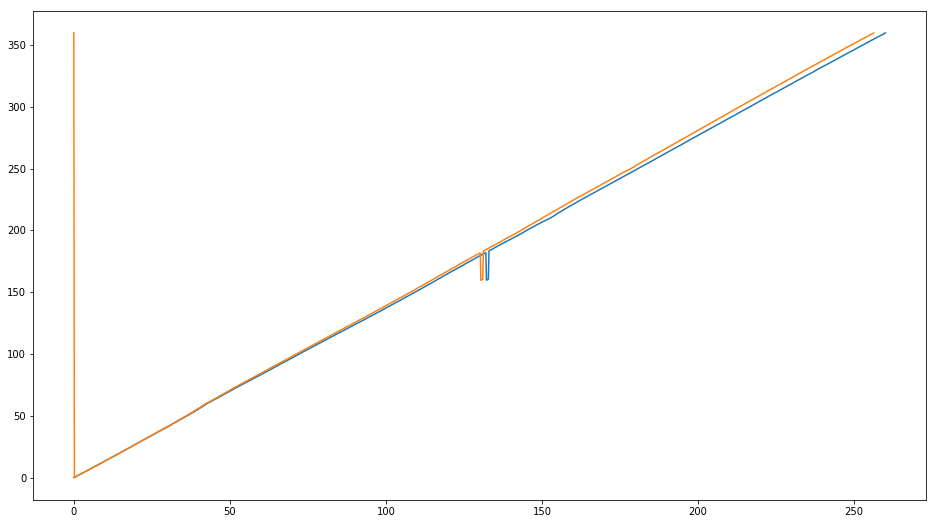

In [65]:
plt.figure(figsize=(16, 9))
for i in range(len(T)):
    plt.plot(T[i], A[i]);

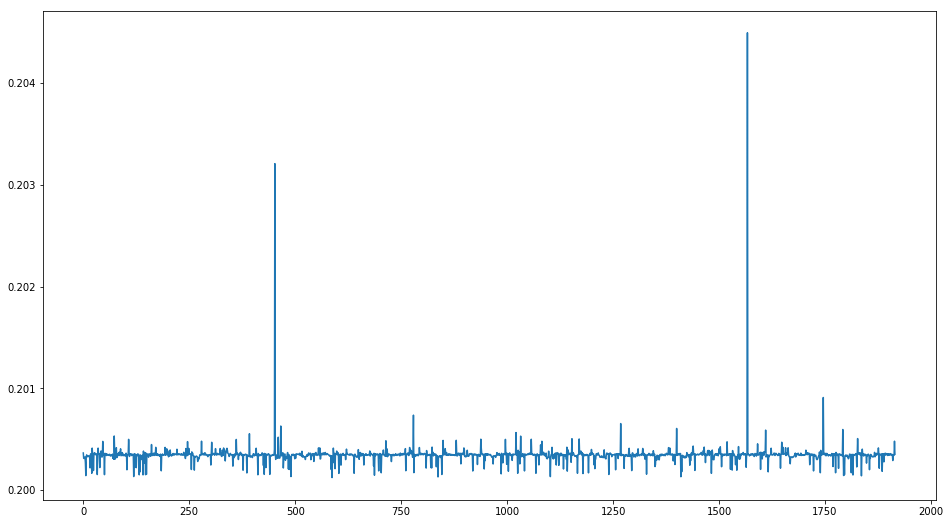

In [137]:
plt.figure(figsize=(16, 9))
plt.plot([T[0][i]-T[0][i-1] for i in range(1, len(T[0]))]);

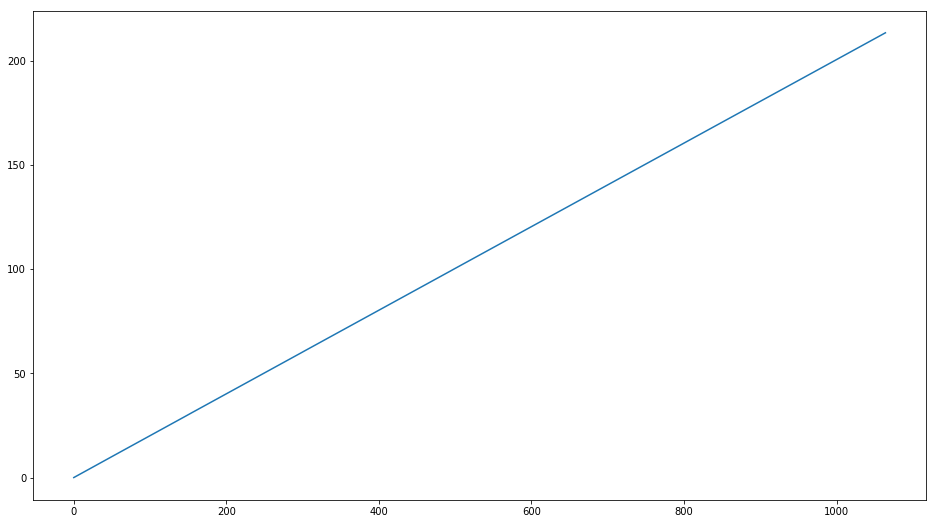

In [128]:
plt.figure(figsize=(16, 9))
for i in range(len(T)):
    plt.plot(T[i]);

In [10]:
def rotate(target=0.0, off=0.0, threshold=1.0, speed=1.0):
    display(HTML("angle"), display_id="angle")
    secs = 0.1
    st = time.time()
    alphas = []
    times = []
    try:
        while True:
            alpha = ams.get_deg_angle(degoffset=off)
            alphas.append(alpha)
            times.append(time.time()-st)
            d = target-alpha
            d2 = d + 360.0
            dist = d if abs(d) < abs(d2) else d2
            fwd = dist > 0.0

            update_display(HTML(f"<font size=72>{alpha:.2f} ({dist:.2f})</font>"), display_id="angle")
            if abs(dist) < threshold:
                motor.stop()
                break
            if fwd:
                motor.forward(speed)
            else:
                motor.backward(speed)
            sleep(secs)
    except:
        print("Interrupted!")
        motor.stop()
    return alphas, times

In [73]:
alphas, times = rotate(target=0.0, off=off, threshold=0.5)

In [72]:
motor.forward(1)

In [61]:
motor.backward(0.1)

In [62]:
motor.stop()

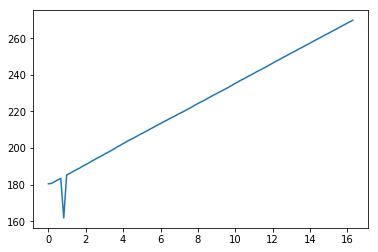

In [48]:
plt.plot(times, alphas);

In [58]:
ams.get_deg_angle(off)

271.494140625

In [63]:
off = ams.get_deg_angle()
off

177.890625

In [10]:
display(HTML("agc"), display_id="agc")

while True:
    agc = ams.get_agc()
#     print(ra, end='\r')
    update_display(HTML(f"<font size=72>{agc}</font>"), display_id="agc")
    time.sleep(0.1)

KeyboardInterrupt: 

# MPU6050

In [2]:
from mpu6050 import mpu6050

In [3]:
sensor = mpu6050(0x68)

In [8]:
sensor.get_accel_data()

{'x': -2.1116858642578125, 'y': 1.1540052001953125, 'z': 10.062829577636718}

In [13]:
sensor.get_gyro_data()

{'x': -2.236641221374046, 'y': -0.9847328244274809, 'z': -1.2748091603053435}

In [8]:
import smbus

In [12]:
def read_mpu6050():
    bus = 1
    address = 0x68
    
    # MPU-6050 Registers
    PWR_MGMT_1 = 0x6B
    PWR_MGMT_2 = 0x6C

    ACCEL_XOUT0 = 0x3B
    ACCEL_YOUT0 = 0x3D
    ACCEL_ZOUT0 = 0x3F

    TEMP_OUT0 = 0x41

    GYRO_XOUT0 = 0x43
    GYRO_YOUT0 = 0x45
    GYRO_ZOUT0 = 0x47

    ACCEL_CONFIG = 0x1C
    GYRO_CONFIG = 0x1B
    
    bus = smbus.SMBus(bus)
    bus.write_byte_data(address, PWR_MGMT_1, 0x00)
    
    def read_i2c_word(register):
        # Read the data from the registers
        high = bus.read_byte_data(address, register)
        low = bus.read_byte_data(address, register + 1)

        value = (high << 8) + low

        if (value >= 0x8000):
            return -((65535 - value) + 1)
        else:
            return value
        
    raw_temp = read_i2c_word(TEMP_OUT0)
    actual_temp = (raw_temp / 340.0) + 36.53
    return actual_temp

read_mpu6050()

23.73

# TEST

In [2]:
import Adafruit_GPIO.SPI as SPI
import Adafruit_SSD1306

In [7]:
RST = 24
DC = 23
SPI_PORT = 0
SPI_DEVICE = 0
disp = Adafruit_SSD1306.SSD1306_128_64(rst=RST, dc=DC, spi=SPI.SpiDev(SPI_PORT, SPI_DEVICE, max_speed_hz=8000000))

SystemError: error return without exception set

In [4]:
disp.begin()

NameError: name 'disp' is not defined